<a href="https://colab.research.google.com/github/pranavpatil450/Electric-Vehicle-Range-Prediciton/blob/main/ML_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
ev_data = pd.read_csv("/content/Electric_Vehicle_Population_Data.csv")
ev_data

VIN (1-10)        County               City State  Postal Code  \
0       KM8K33AGXL          King            Seattle    WA      98103.0   
1       1C4RJYB61N          King            Bothell    WA      98011.0   
2       1C4RJYD61P        Yakima             Yakima    WA      98908.0   
3       5YJ3E1EA7J          King           Kirkland    WA      98034.0   
4       WBY7Z8C5XJ      Thurston            Olympia    WA      98501.0   
...            ...           ...                ...   ...          ...   
150477  WBY43AW05P  Grays Harbor          Montesano    WA      98563.0   
150478  5YJ3E1EB7P          King            Seattle    WA      98104.0   
150479  5YJYGDEEXM          King            Seattle    WA      98109.0   
150480  5UXTA6C08P     Snohomish  Mountlake Terrace    WA      98043.0   
150481  7SAYGDEF8N        Skagit       Mount Vernon    WA      98273.0   

        Model Year     Make           Model  \
0             2020  HYUNDAI            KONA   
1             2022     JEEP  GRAND CHEROKEE   
2             2023     JEEP  GRAND CHEROKEE   
3             2018    TESLA         MODEL 3   
4             2018      BMW              I3   
...            ...      ...             ...   
150477        2023      BMW              I4   
150478        2023    TESLA         MODEL 3   
150479        2021    TESLA         MODEL Y   
150480        2023      BMW              X5   
150481        2022    TESLA         MODEL Y   

                         Electric Vehicle Type  \
0               Battery Electric Vehicle (BEV)   
1       Plug-in Hybrid Electric Vehicle (PHEV)   
2       Plug-in Hybrid Electric Vehicle (PHEV)   
3               Battery Electric Vehicle (BEV)   
4       Plug-in Hybrid Electric Vehicle (PHEV)   
...                                        ...   
150477          Battery Electric Vehicle (BEV)   
150478          Battery Electric Vehicle (BEV)   
150479          Battery Electric Vehicle (BEV)   
150480  Plug-in Hybrid Electric Vehicle (PHEV)   
150481          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                 Clean Alternative Fuel Vehicle Eligible             258   
1                   Not eligible due to low battery range              25   
2                   Not eligible due to low battery range              25   
3                 Clean Alternative Fuel Vehicle Eligible             215   
4                 Clean Alternative Fuel Vehicle Eligible              97   
...                                                   ...             ...   
150477  Eligibility unknown as battery range has not b...               0   
150478  Eligibility unknown as battery range has not b...               0   
150479  Eligibility unknown as battery range has not b...               0   
150480            Clean Alternative Fuel Vehicle Eligible              30   
150481  Eligibility unknown as battery range has not b...               0   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0               0                  43.0       249675142   
1               0                   1.0       233928502   
2               0                  14.0       229675939   
3               0                  45.0       104714466   
4               0                  22.0       185498386   
...           ...                   ...             ...   
150477          0                  19.0       251204075   
150478          0                  43.0       241344414   
150479          0                  43.0       180705626   
150480          0                   1.0       240473950   
150481          0                  40.0       207667589   

                       Vehicle Location  \
0          POINT (-122.34301 47.659185)   
1          POINT (-122.20578 47.762405)   
2       POINT (-120.6027202 46.5965625)   
3          POINT (-122.209285 47.71124)   
4          POINT (-122.89692 47.043535)   
...                                 ...   
150477     POINT (

In [ ]:
ev_data.info()    #Total entries ke liye

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

In [ ]:
ev_data = ev_data.dropna(subset=['County','City'])    #as they have missing values so i decided to drop the entire row
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150479 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150479 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150479 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150479 non-null  int64  
 6   Make                                               150479 non-null  object 
 7   Model                                              150479 non-null  object 
 8   Electric Vehicle Type                              150479 non-null  object 
 9 

In [ ]:
ev_data = ev_data[['City','State','County','Make','Model','Model Year','Electric Vehicle Type']]  #Since other columns ar unnecessary we only take in consideration the useful ones for analysis.
print(ev_data.head())

       City State    County     Make           Model  Model Year  \
0   Seattle    WA      King  HYUNDAI            KONA        2020   
1   Bothell    WA      King     JEEP  GRAND CHEROKEE        2022   
2    Yakima    WA    Yakima     JEEP  GRAND CHEROKEE        2023   
3  Kirkland    WA      King    TESLA         MODEL 3        2018   
4   Olympia    WA  Thurston      BMW              I3        2018   

                    Electric Vehicle Type  
0          Battery Electric Vehicle (BEV)  
1  Plug-in Hybrid Electric Vehicle (PHEV)  
2  Plug-in Hybrid Electric Vehicle (PHEV)  
3          Battery Electric Vehicle (BEV)  
4  Plug-in Hybrid Electric Vehicle (PHEV)  


In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import gridplot
import math

output_notebook()

In [ ]:
ev_make = ev_data.groupby('Make').size().reset_index(name='Count')

#Calculating the percentage
make_total = ev_make['Count'].sum()
ev_make['Percentage'] = (ev_make['Count'] / make_total) * 100

source = ColumnDataSource(ev_make)

make_visual = figure(x_range=ev_make['Make'], title="Percentage of Electric Vehicles by Make",x_axis_label="Make",y_axis_label="Total EV",height = 300,width = 800)

#styling
make_visual.xaxis.major_label_orientation = math.pi/4
make_visual.xgrid.grid_line_color = None
make_visual.vbar(x='Make', top='Count', width=0.7, source=source)

#Add HoverTool
make_visual.add_tools(HoverTool(tooltips= [('Percentage','@Percentage%')]))

In [ ]:
show(make_visual)

In [ ]:
ev_type = ev_data.groupby('Electric Vehicle Type').size().reset_index(name="Count")

total_type = ev_type['Count'].sum()
ev_type['Percentage'] = (ev_type['Count'] / total_type) * 100


type_source = ColumnDataSource(ev_type)


type_visual = figure(
    title="Total Electric Vehicle by Type",
    x_range=ev_type['Electric Vehicle Type'],
    x_axis_label='Electric Vehicle Type',
    y_axis_label='Total EV',
    height=300,
    width=800
)


type_visual.xgrid.grid_line_color = None


type_visual.vbar(x="Electric Vehicle Type", top='Count', width=0.7, source=type_source)


type_visual.add_tools(HoverTool(tooltips=[('Percentage', '@Percentage%')]))



In [ ]:

show(type_visual)

In [ ]:
#37 entries
brands = []


make_group = ev_data.groupby('Make')


for brand in ev_make['Make']:

    if make_group.get_group(brand)['Model'].unique().size > 1:
        brands.append(brand)
    else:
        pass


plots = []


for brand in brands:
    brand_data = make_group.get_group(brand)
    model = brand_data['Model'].unique()


    model_fig = figure(x_range=model, title=brand, x_axis_label='Model', y_axis_label='Total EV')
    model_fig.xaxis.major_label_orientation = math.pi/4
    counts = list(brand_data['Model'].value_counts())
    data = {'Model':model,'Count':counts}
    model_fig.vbar(x='Model',top='Count', width=0.8,source=data)

    plots.append(model_fig)


num_cols=4
grid = gridplot(plots,ncols=num_cols,width = 300,height = 300)
show(grid)

In [ ]:
segmented_market = ev_data.groupby(['Make' , 'Model' , 'Electric Vehicle Type']).size().reset_index(name='Count')
segmented_market['Region']=segmented_market.apply(lambda row: f"{row['Make']} {row['Model']} ({row['Electric Vehicle Type']})",axis=1)
source = ColumnDataSource(segmented_market)
segment_fig = figure(y_range=segmented_market['Region'].tolist(),height=1000,width=1000,
                     title="Segmented Electric Vehicle Market" , x_axis_label = "Number of Vehicles",
                     y_axis_label = "Make,Model,Electric Vehicle Type",
                     toolbar_location=None,tools="")
segment_fig.hbar(y='Region',right='Count',height=0.5,source=source,color='skyblue')
segment_fig.ygrid.grid_line_color = None

In [ ]:
show(segment_fig)

In [ ]:
ev_data['Model Year'] = ev_data['Model Year'].apply(str)

In [ ]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150479 entries, 0 to 150481
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   City                   150479 non-null  object
 1   State                  150479 non-null  object
 2   County                 150479 non-null  object
 3   Make                   150479 non-null  object
 4   Model                  150479 non-null  object
 5   Model Year             150479 non-null  object
 6   Electric Vehicle Type  150479 non-null  object
dtypes: object(7)
memory usage: 9.2+ MB


In [ ]:
ev_year = ev_data.groupby('Model Year')

In [ ]:
sales_by_model_year = ev_year.size()
print(sales_by_model_year)

Model Year
1997        1
1998        1
1999        4
2000        8
2002        2
2003        1
2008       18
2010       24
2011      796
2012     1633
2013     4565
2014     3613
2015     4934
2016     5650
2017     8574
2018    14441
2019    10716
2020    11294
2021    18684
2022    27799
2023    37079
2024      642
dtype: int64


In [ ]:
sales_by_model_year = ev_data.groupby('Model Year').size().reset_index(name="Count")


total_sales = sales_by_model_year['Count'].sum()
sales_by_model_year['Percentage'] = (sales_by_model_year['Count'] / total_sales) * 100


source = ColumnDataSource(sales_by_model_year)

year_visual = figure(
    x_range=sales_by_model_year['Model Year'].astype(str),
    height=500,
    title="Electric Vehicle Sales by Model Year",
    x_axis_label="Model Year",
    y_axis_label="Number of Vehicles",
    toolbar_location=None,
    tools=""
)


year_visual.vbar(
    x='Model Year',
    top='Count',
    width=0.9,
    source=source,
    color='skyblue',
    alpha=0.8
)


year_visual.xaxis.major_label_orientation = 1.2
year_visual.y_range.start = 0
year_visual.ygrid.grid_line_color = None



year_visual.add_tools(HoverTool(tooltips=[('Percentage', '@Percentage%')]))

In [ ]:
show(year_visual)

In [ ]:
vehicles_by_region = ev_data.groupby(['County','City','State','Model']).size().reset_index(name='Count')

In [ ]:
regions = [tuple(region) for region in vehicles_by_region[['County','City','State']].values]

In [ ]:
from bokeh.palettes import viridis

num_regions = len(regions)

desired_palette_length = 256

repeat_factor = num_regions // desired_palette_length + 1

truncated_palette = viridis(desired_palette_length) * repeat_factor

palette = truncated_palette[:num_regions]

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(50, 25))

for region, group in vehicles_by_region.groupby(['County', 'City', 'State']):
    plt.bar(group['Model'], group['Count'], label=f"{region[0]}, {region[1]}, {region[2]}")

plt.xlabel('Electric Vehicle Model')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of Electric Vehicle Models Across Different Regions')
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.tight_layout()
plt.show()


<ipython-input-22-803e2c1d1201>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/content/Electric_Vehicle_Population_Data.csv'
df = pd.read_csv(file_path, encoding='ascii')


df.head()

VIN (1-10)    County      City State  Postal Code  Model Year     Make  \
0  KM8K33AGXL      King   Seattle    WA      98103.0        2020  HYUNDAI   
1  1C4RJYB61N      King   Bothell    WA      98011.0        2022     JEEP   
2  1C4RJYD61P    Yakima    Yakima    WA      98908.0        2023     JEEP   
3  5YJ3E1EA7J      King  Kirkland    WA      98034.0        2018    TESLA   
4  WBY7Z8C5XJ  Thurston   Olympia    WA      98501.0        2018      BMW   

            Model                   Electric Vehicle Type  \
0            KONA          Battery Electric Vehicle (BEV)   
1  GRAND CHEROKEE  Plug-in Hybrid Electric Vehicle (PHEV)   
2  GRAND CHEROKEE  Plug-in Hybrid Electric Vehicle (PHEV)   
3         MODEL 3          Battery Electric Vehicle (BEV)   
4              I3  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             258   
1             Not eligible due to low battery range              25   
2             Not eligible due to low battery range              25   
3           Clean Alternative Fuel Vehicle Eligible             215   
4           Clean Alternative Fuel Vehicle Eligible              97   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  43.0       249675142   
1          0                   1.0       233928502   
2          0                  14.0       229675939   
3          0                  45.0       104714466   
4          0                  22.0       185498386   

                  Vehicle Location  \
0     POINT (-122.34301 47.659185)   
1     POINT (-122.20578 47.762405)   
2  POINT (-120.6027202 46.5965625)   
3     POINT (-122.209285 47.71124)   
4     POINT (-122.89692 47.043535)   

                                Electric Utility  2020 Census Tract  
0   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303300e+10  
1  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303302e+10  
2                                     PACIFICORP       5.307700e+10  
3  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303302e+10  
4                         PUGET SOUND ENERGY INC       5.306701e+10

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

In [ ]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 341
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


In [ ]:
# Handle missing values
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150137 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150137 non-null  object 
 1   County                                             150137 non-null  object 
 2   City                                               150137 non-null  object 
 3   State                                              150137 non-null  object 
 4   Postal Code                                        150137 non-null  float64
 5   Model Year                                         150137 non-null  int64  
 6   Make                                               150137 non-null  object 
 7   Model                                              150137 non-null  object 
 8   Electric Vehicle Type                              150137 non-null  object 
 9 

In [ ]:

le = LabelEncoder()
categorical_columns = ['County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))


df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce')


print("\
Basic statistics:")
print(df.describe())

Basic statistics:
              County           City     State    Postal Code     Model Year  \
count  150137.000000  150137.000000  150137.0  150137.000000  150137.000000   
mean       19.293166     250.374651       0.0   98257.884406    2020.007040   
std         8.070506     136.695366       0.0     301.505834       3.015218   
min         0.000000       0.000000       0.0   98001.000000    1997.000000   
25%        16.000000     132.000000       0.0   98052.000000    2018.000000   
50%        16.000000     302.000000       0.0   98122.000000    2021.000000   
75%        26.000000     355.000000       0.0   98370.000000    2023.000000   
max        38.000000     460.000000       0.0   99403.000000    2024.000000   

                Make          Model  Electric Vehicle Type  \
count  150137.000000  150137.000000          150137.000000   
mean       23.508096      71.468319               0.223489   
std        10.479271      25.138172               0.416585   
min         0.000000  

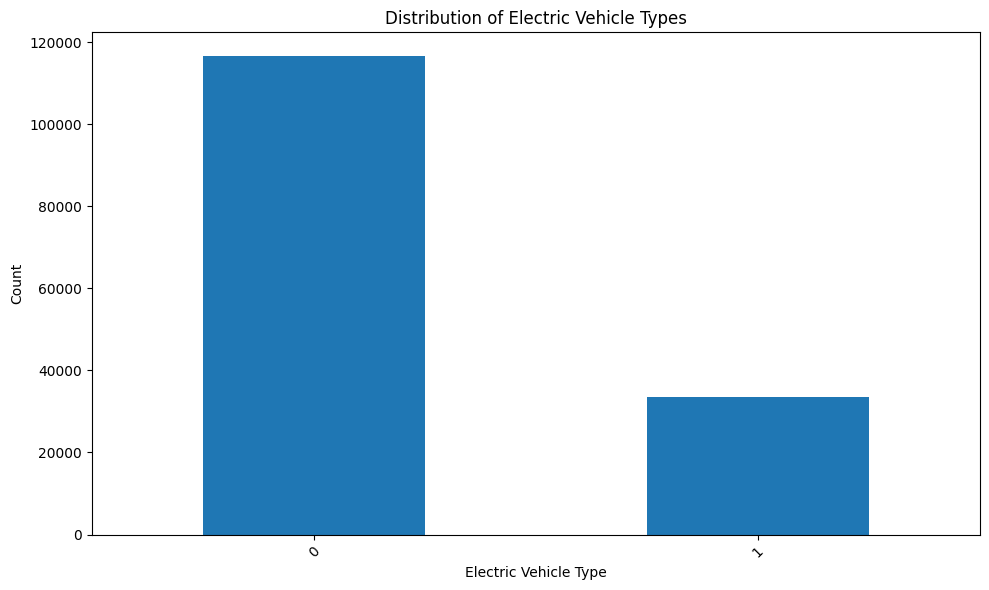

In [ ]:
plt.figure(figsize=(10, 6))
df['Electric Vehicle Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

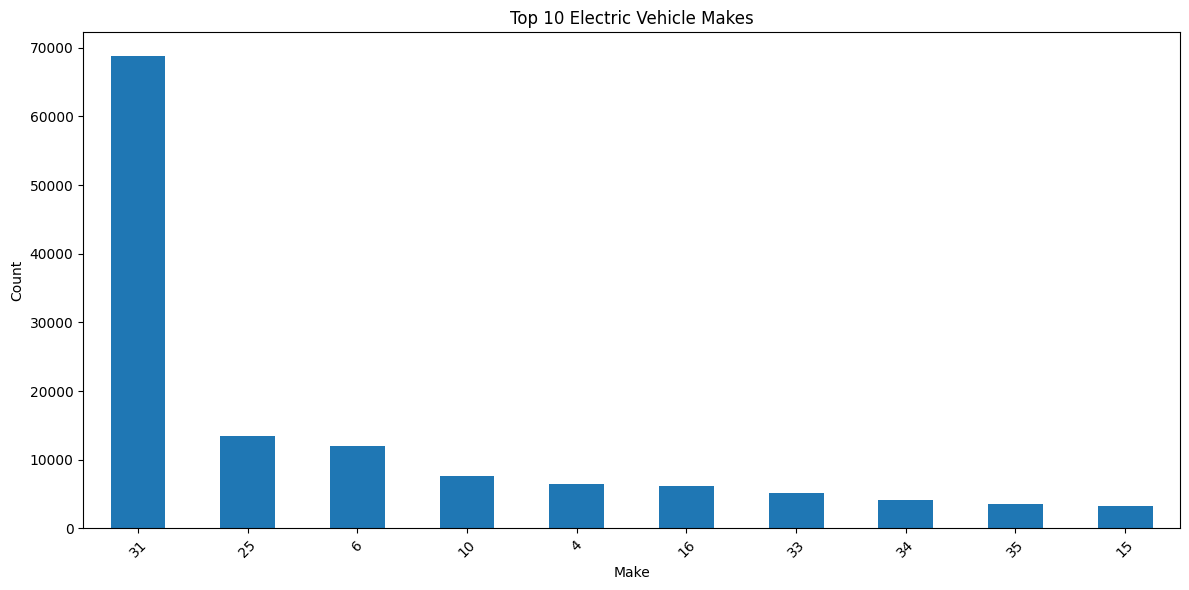

In [ ]:
plt.figure(figsize=(12, 6))
df['Make'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Electric Vehicle Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

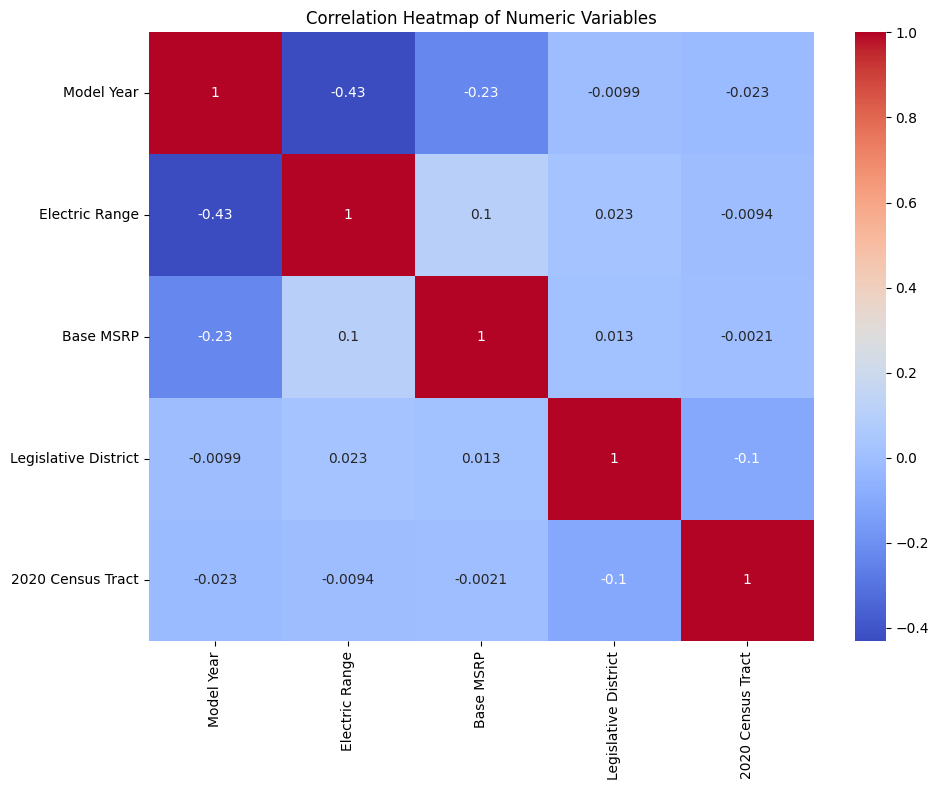

In [ ]:
numeric_columns = ['Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', '2020 Census Tract']
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


features = ['Model Year', 'Electric Range', 'Base MSRP']
X = df[features]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

print("Clustering analysis completed.")

Clustering analysis completed.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

target = 'Electric Range'
features = ['Model Year', 'Base MSRP', 'Make', 'Model', 'Electric Vehicle Type']
X = df[features]
y = df[target]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

print("Predictive analysis completed.")

Mean Squared Error: 6647.228752352145
R-squared: 0.2759632690685363
Predictive analysis completed.


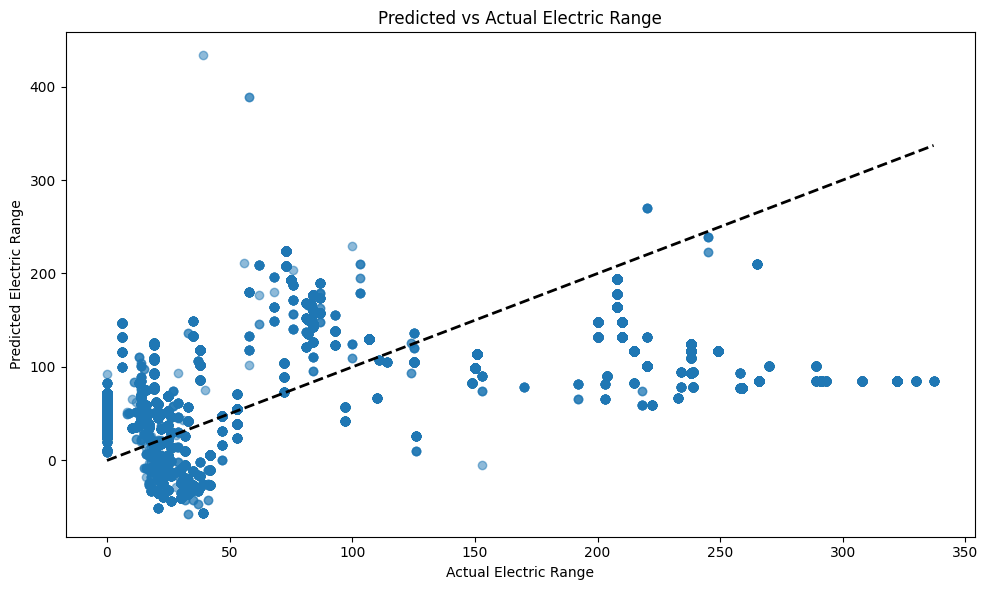

Accuracy evaluation completed.


In [ ]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicted vs Actual Electric Range')
plt.xlabel('Actual Electric Range')
plt.ylabel('Predicted Electric Range')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.tight_layout()
plt.show()

print("Accuracy evaluation completed.")

Random Forest Mean Squared Error: 59.6825992955379
Random Forest R-squared: 0.9934991865486587


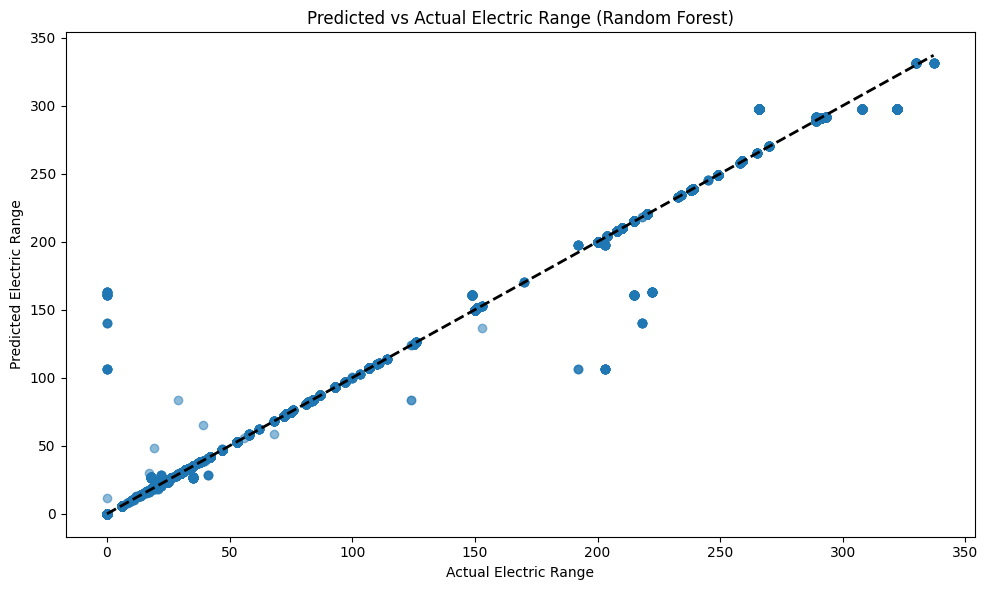

Random Forest predictive analysis completed.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt


target = 'Electric Range'
features = ['Model Year', 'Base MSRP', 'Make', 'Model', 'Electric Vehicle Type']

X = df[features]  # Features
y = df[target]    # Target

#  'Make', 'Model', 'Electric Vehicle Type'
X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Mean Squared Error:", mse)
print("Random Forest R-squared:", r2)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicted vs Actual Electric Range (Random Forest)')
plt.xlabel('Actual Electric Range')
plt.ylabel('Predicted Electric Range')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.tight_layout()
plt.show()

print("Random Forest predictive analysis completed.")


Gradient Boosting Mean Squared Error: 212.14901719750927
Gradient Boosting R-squared: 0.9768920723801398


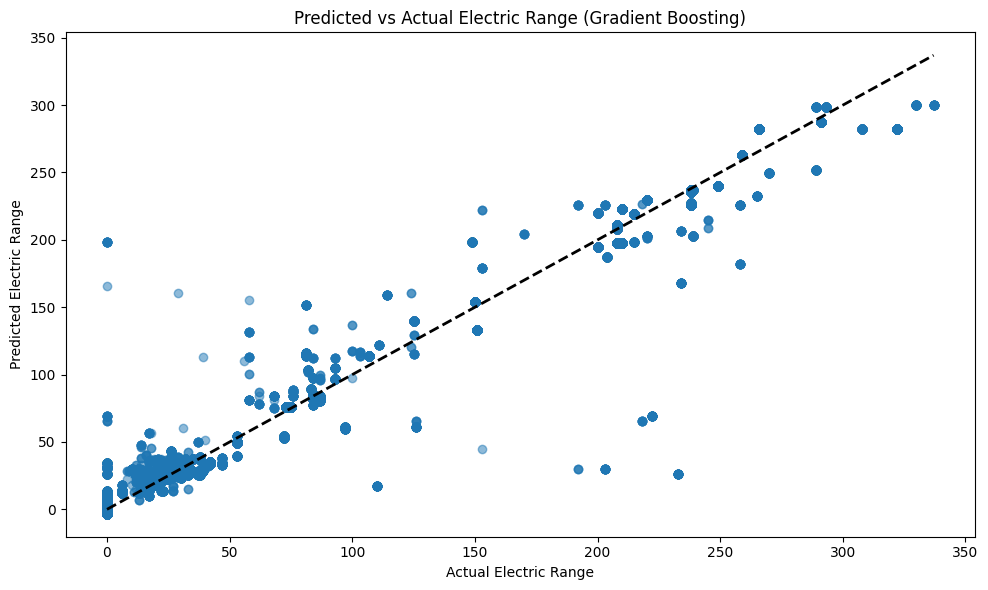

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt


target = 'Electric Range'
features = ['Model Year', 'Base MSRP', 'Make', 'Model', 'Electric Vehicle Type']

X = df[features]  # Features
y = df[target]    # Target


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Mean Squared Error:", mse)
print("Gradient Boosting R-squared:", r2)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicted vs Actual Electric Range (Gradient Boosting)')
plt.xlabel('Actual Electric Range')
plt.ylabel('Predicted Electric Range')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')

# Handle missing 'Base MSRP' values by filling with median
df['Base MSRP'] = df['Base MSRP'].replace(0, df['Base MSRP'].median())

# Select relevant columns
target = 'Electric Range'
features = ['Model Year', 'Base MSRP', 'Make', 'Model', 'Electric Vehicle Type']

# One-hot encoding categorical variables
X = df[features]
y = df[target]
X = pd.get_dummies(X, drop_first=True)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Mean Squared Error:", mse)
print("Random Forest R-squared:", r2)

# Hardcoded input for prediction
input_data = {
    'Model Year': [2020],
    'Base MSRP': [0],  # Set to 0 but will use the median from training
    'Make_TESLA': [1],  # Encode for 'JEEP' (one-hot)
    'Model_MODEL 3': [1],  # Encode for 'GRAND CHEROKEE'
    'Electric Vehicle Type_Battery Electric Vehicle (BEV)': [1]  # Encode for PHEV
}

# Convert to DataFrame
input_df = pd.DataFrame(input_data)

# Ensure all columns match the training data (add missing columns with 0)
missing_cols = set(X_train.columns) - set(input_df.columns)
for col in missing_cols:
    input_df[col] = 0

# Reorder the columns to match the training data
input_df = input_df[X_train.columns]

# Predict the electric range for the hardcoded input
predicted_range = model.predict(input_df)
print(f"Predicted Electric Range: {predicted_range[0]} miles")

# Plot Predicted vs Actual Electric Range
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicted vs Actual Electric Range (Random Forest)')
plt.xlabel('Actual Electric Range')
plt.ylabel('Predicted Electric Range')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.tight_layout()
plt.show()


Random Forest Mean Squared Error: 62.26640996594522
Random Forest R-squared: 0.9932929738627617
Predicted Electric Range: 297.65837784223726 miles


<ipython-input-2-4489c500a8e6>:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-2-4489c500a8e6>:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-2-4489c500a8e6>:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipy

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')

# Handle missing 'Base MSRP' values by filling with median
df['Base MSRP'] = df['Base MSRP'].replace(0, df['Base MSRP'].median())

# Select relevant columns
target = 'Electric Range'
features = ['Model Year', 'Base MSRP', 'Make', 'Model', 'Electric Vehicle Type']

# One-hot encoding categorical variables
X = df[features]
y = df[target]
X = pd.get_dummies(X, drop_first=True)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Mean Squared Error:", mse)
print("Random Forest R-squared:", r2)

# Flexible input for prediction
model_year = 2022
base_msrp = df['Base MSRP'].median()  # Will use median value in prediction
make = 'JEEP'
model_name = 'GRAND CHEROKEE'
ev_type = 'Plug-in Hybrid Electric Vehicle (PHEV)'

# Creating a DataFrame for the input
input_data = {
    'Model Year': [model_year],
    'Base MSRP': [base_msrp],
    'Make': [make],
    'Model': [model_name],
    'Electric Vehicle Type': [ev_type]
}

# Convert to DataFrame
input_df = pd.DataFrame(input_data)

# Process input to match training data format
input_df = pd.get_dummies(input_df, drop_first=True)

# Ensure all columns match by adding missing columns with 0
missing_cols = set(X_train.columns) - set(input_df.columns)
for col in missing_cols:
    input_df[col] = 0

# Reorder columns to match training data
input_df = input_df[X_train.columns]

# Predict the electric range for the flexible input
predicted_range = model.predict(input_df)
print(f"Predicted Electric Range: {predicted_range[0]} miles")

# Plot Predicted vs Actual Electric Range
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, alpha=0.5)
# plt.title('Predicted vs Actual Electric Range (Random Forest)')
# plt.xlabel('Actual Electric Range')
# plt.ylabel('Predicted Electric Range')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
# plt.tight_layout()
# plt.show()


Random Forest Mean Squared Error: 62.26640996594522
Random Forest R-squared: 0.9932929738627617
Predicted Electric Range: 0.0 miles


<ipython-input-4-339b4f74d987>:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-4-339b4f74d987>:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-4-339b4f74d987>:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipy

In [ ]:
# First, we can aggregate vehicle counts based on 'Make', 'Model', and 'Model Year'
sales_data = df.groupby(['Make', 'Model', 'Model Year']).size().reset_index(name='Sales')

# Now let's add other relevant features for the prediction, such as 'Electric Range' and 'Base MSRP'
sales_data = sales_data.merge(df[['Make', 'Model', 'Model Year', 'Electric Range', 'Base MSRP']],
                              on=['Make', 'Model', 'Model Year'],
                              how='left')

# Drop duplicates to avoid repetition after merging
sales_data = sales_data.drop_duplicates()

# Show the first few rows of the prepared data
print(sales_data.head())

     Make  Model  Model Year  Sales  Electric Range  Base MSRP
0       0    114        2024     12              33          0
12      1      7        2016    212              16          0
224     1      7        2017    187              16          0
411     1      7        2018    173              16          0
584     1      8        2021     12              24          0


In [ ]:
# Step 2: Data Cleaning

# Check for missing values
print(sales_data.isnull().sum())

# Drop rows with missing values in important columns (like Base MSRP or Electric Range)
sales_data = sales_data.dropna(subset=['Electric Range', 'Base MSRP'])

# Recheck if any missing values remain
print(sales_data.isnull().sum())


Make              0
Model             0
Model Year        0
Sales             0
Electric Range    0
Base MSRP         0
dtype: int64
Make              0
Model             0
Model Year        0
Sales             0
Electric Range    0
Base MSRP         0
dtype: int64


In [ ]:
# Select relevant features for the model
features = ['Model Year', 'Electric Range', 'Base MSRP']
X = sales_data[features]  # Independent variables
y = sales_data['Sales']   # Target variable (vehicle "sales" count)

# Check the selected features and target
print(X.head())
print(y.head())

     Model Year  Electric Range  Base MSRP
0          2024              33          0
12         2016              16          0
224        2017              16          0
411        2018              16          0
584        2021              24          0
0       12
12     212
224    187
411    173
584     12
Name: Sales, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing data
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (390, 3)
Testing data shape: (98, 3)


In [ ]:
from sklearn.linear_model import LinearRegression

# Step 5: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error (MSE) and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 601524.8512555951
R-squared: 0.0353391947568541


In [ ]:
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Step 2: Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R-squared:", r2_rf)

Random Forest Mean Squared Error: 599975.8938070924
Random Forest R-squared: 0.037823245975088904


In [ ]:
print(sales_data.columns)

Index(['Make', 'Model', 'Model Year', 'Sales', 'Electric Range', 'Base MSRP'], dtype='object')


In [ ]:
# Merge 'Electric Vehicle Type' back into sales_data from the original dataset
sales_data = sales_data.merge(df[['Make', 'Model', 'Model Year', 'Electric Vehicle Type']],
                              on=['Make', 'Model', 'Model Year'],
                              how='left')

# Check if the column has been added
print(sales_data.columns)


Index(['Make', 'Model', 'Model Year', 'Sales', 'Electric Range', 'Base MSRP',
       'Electric Vehicle Type'],
      dtype='object')


In [ ]:
# Perform one-hot encoding for categorical columns 'Make' and 'Electric Vehicle Type'
df_encoded = pd.get_dummies(sales_data, columns=['Make', 'Electric Vehicle Type'], drop_first=True)

# Update the feature set
features_encoded = ['Model Year', 'Electric Range', 'Base MSRP'] + [col for col in df_encoded.columns if 'Make_' in col or 'Electric Vehicle Type_' in col]
X_encoded = df_encoded[features_encoded]
y_encoded = df_encoded['Sales']

# Proceed with train-test split and model training
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)


In [ ]:
# Train the Random Forest model
rf_model_encoded = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_encoded.fit(X_train_encoded, y_train_encoded)

# Make predictions
y_pred_rf_encoded = rf_model_encoded.predict(X_test_encoded)

# Evaluate the model
mse_rf_encoded = mean_squared_error(y_test_encoded, y_pred_rf_encoded)
r2_rf_encoded = r2_score(y_test_encoded, y_pred_rf_encoded)

print("Random Forest (Encoded) Mean Squared Error:", mse_rf_encoded)
print("Random Forest (Encoded) R-squared:", r2_rf_encoded)


Random Forest (Encoded) Mean Squared Error: 2184150.3610447356
Random Forest (Encoded) R-squared: 0.8107832106629637


Random Forest Mean Squared Error: 62.26640996594522
Random Forest R-squared: 0.9932929738627617


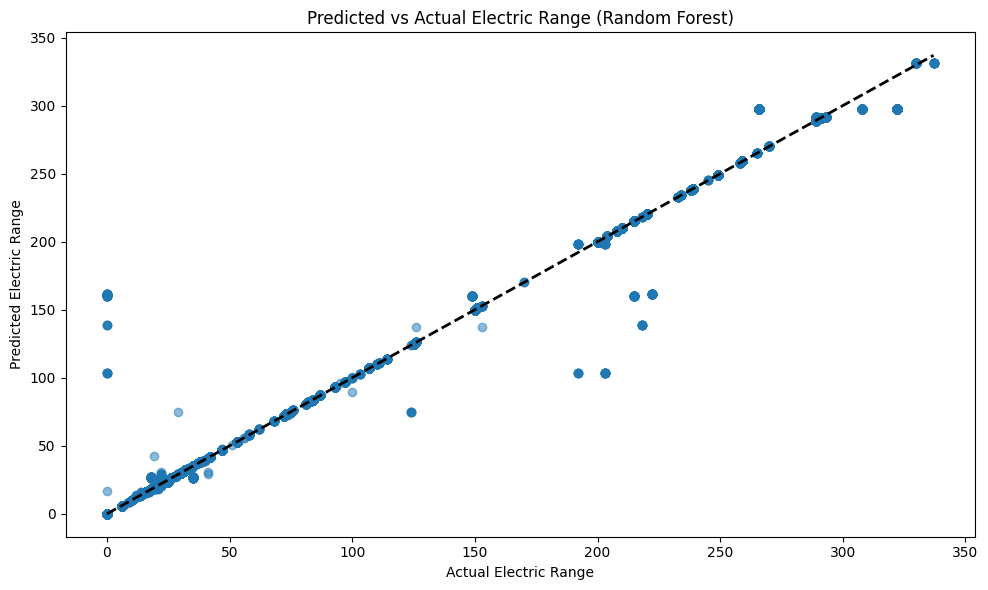

Predicted Electric Range for JEEP GRAND CHEROKEE (2022): 0.00 miles


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Step 2: Define target and features
target = 'Electric Range'
features = ['Model Year', 'Base MSRP', 'Make', 'Model', 'Electric Vehicle Type']

# Step 3: Prepare the feature matrix (X) and target vector (y)
X = df[features]  # Features
y = df[target]    # Target

# Step 4: One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Create and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 8: Calculate Mean Squared Error and R-squared values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Mean Squared Error:", mse)
print("Random Forest R-squared:", r2)

# Step 9: Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicted vs Actual Electric Range (Random Forest)')
plt.xlabel('Actual Electric Range')
plt.ylabel('Predicted Electric Range')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.tight_layout()
plt.show()

# Step 10: Define a function to predict Electric Range for hardcoded input
def predict_electric_range(model, year, msrp, make, model_name, ev_type):
    # Create a DataFrame for the input data
    input_data = pd.DataFrame({
        'Model Year': [year],
        'Base MSRP': [msrp],
        'Make': [make],
        'Model': [model_name],
        'Electric Vehicle Type': [ev_type]
    })

    # One-hot encode the input data (using the same encoding as training data)
    input_data_encoded = pd.get_dummies(input_data, drop_first=True)

    # Align the input data with the training data columns
    input_data_encoded = input_data_encoded.reindex(columns=X.columns, fill_value=0)

    # Make the prediction
    predicted_range = model.predict(input_data_encoded)

    return predicted_range[0]

# Hardcoded input values for prediction
year = 2022
msrp = 66000  # Base MSRP
make = 'JEEP'
model_name = 'GRAND CHEROKEE'
ev_type = 'Plug-in Hybrid Electric Vehicle (PHEV)'

# Make prediction
predicted_electric_range = predict_electric_range(model, year, msrp, make, model_name, ev_type)
print(f'Predicted Electric Range for {make} {model_name} ({year}): {predicted_electric_range:.2f} miles')
